# Part IA Structures Laboratory: Curvature and deflection in elastic beams

**<font color=red>The first time you run this notebook:</font>**

You need to click “Copy to Drive” above this message, otherwise your changes won’t be saved! Please use your @cam.ac.uk Google account. You can’t break the notebook for anyone else, but your work won’t be saved unless you do this!

<img src='https://raw.githubusercontent.com/fcirak/ElasticBeamsLab/main/figs/copyToDrive.png' width=650/>

**<font color=red>After you've copied this notebook to your Google Drive</font>** always return to **your copy**, rather than clicking the original link in Moodle again. You can do this by clicking "File", "Open notebook" and clicking "Copy of IA_Elastic_Beams.ipynb", or whatever you renamed your local copy.

**Note:** If you're using Safari and can't see any images in this Colab notebook, we recommend switching to a different browser (we've tested it with Firefox and Chrome, so these should work).


## How will this lab work?

Important: Please complete the initial parts of this Colaboratory notebook before your lab session so that you know what to do in the lab. There will be a demonstrator there to help you but it is better to come prepared!

You'll only be physically in the lab for 40 mins out of your alloted 2-hour lab session. You can find your lab group's time slot on the IA Elastic Beams Moodle page, and we'll also calculate it a bit later!

**Important:** We recommend that you complete the initial sections of this Colaboratory notebook (Part I) **before** your scheduled lab session/online support session and then work on the main lab section (Part II) during the scheduled lab session, and the data analysis (Part III) after the lab session.

### When to go to the lab

You will carry out the instructions above during your lab session. Remember you will only be in the lab physically for 40 mins. We can use some Python here to calculate your timeslot using your lab group number, by running the code cell below. Fill in your lab group number and the start time of your 2-hour timeslot as indicated.

In [1]:
Time_Label = [9.00,9.00,9.00,9.00,9.00,9.40,9.40,9.40,9.40,9.40,10.20,10.20,10.20,10.20,10.20]
#insert your lab group number below
Lab_Group_Number = 101
#and whether your 2-hour lab session starts at 9 or 11 below
Lab_Session_Start = 11
Slot = (Lab_Group_Number - 1) % 15
Slot_Time = Time_Label[Slot]

if Lab_Session_Start == 9:
  print("Please come to the lab at ", "%.2f" % Slot_Time)
elif Lab_Session_Start == 11:
  Slot_Time = Slot_Time + 2
  print("Please come to the lab at ", "%.2f" % Slot_Time)
else:
  print("Error! Please write in 9 or 11 for Lab_Session_Start")

Please come to the lab at  12.20


### How to get the most from this laboratory

To complete this laboratory with maximum learning outcomes:

1.   Read through this notebook from the start until you are told to stop and wait for your lab session
2.   Watch the videos when prompted
3.   Download the spreadsheet, take your measurements in the lab and then analyse them as instructed
4.   Write a report on your findings

### Copy the Google Sheet template
We will now save a copy of the Google Sheet which includes the provided experimental results. Please read this section before clicking on the link below.

**Important:** Remember to **Copy to Drive**, just like we did with this notebook! This time you need to click "File", "Make a copy", and keep the Folder as "My Drive". Again, please use your @cam Google account.

Some cells are blank and you'll be told how to calculate these later on in this notebook.

Here is the link:

https://docs.google.com/spreadsheets/d/1BwSg7AHNSpkG9QaznelD72fzQ-k6p26o2dCmKFjuM6M/edit?usp=share_link

## Learning objectives

To measure the curvature in an elastic beam under load; and to relate the measured curvature to bending moments and deflections.

## Introduction

A beam responds to an applied load by deflecting by an amount depending on the load, the span of the beam, etc. Remember that these deflections are often so small that they cannot be seen with the naked eye. In this experiment we will investigate what happens to the geometry of the beam when it sustains a load. We could measure the deflection of the beam using a set of displacement gauges distributed along the beam. Instead we will use a single instrument placed at various locations along the beam to measure the *local curvature* of the deformed beam. After measuring the curvature at several selected locations, numerical integration will be used to first compute the slope and then the deflection of the beam.

## Part I: Theory

This section introduces the topic of curvature and the theoretical aspects of the lab using a short video.

### Curvature

What is curvature, and how do we measure it? 

The figure below shows, from left to right, a straight line, a circle, and an s-shaped curve. The straight line has *zero* curvature, the circle has uniform curvature, and the third curve has curvature which varies along its length. But how do we measure curvature? 

First, we can obviously tell by using a straight-edge when a line has *zero* curvature. With a circle it seems obvious that the curvature depends on the *radius* of the curve; but obviously the radius itself is not a direct measure of curvature, as a straight line could be regarded as part of a circle of *infinite* radius, even though it has zero curvature.

<figure>
<center>
<img src='https://raw.githubusercontent.com/fcirak/ElasticBeamsLab/main/figs/Figure1CurvedLinesNew.png' width=600/>
<figcaption>Lines of different curvatures</figcaption></center>
</figure>

A general curve in a plane can be described in a number of ways. One way is by Cartesian $(x, y)$ co-ordinates; we usually write $y = y(x)$ . Another way is by means of so-called *intrinsic co-ordinates* $(s, ψ)$ . Here, $s$ is the arc-length measured along the curve from a suitable datum, and $ψ$ is the angle between the tangent to the curve at a given point and a fixed reference direction: $ψ = ψ(s)$. In the figure below, the left-hand curve has $ψ =$ constant, independently of length, while the right-hand curve has $ψ$ which increases steadily with $s$.

<figure>
<center>
<img src='https://raw.githubusercontent.com/fcirak/ElasticBeamsLab/main/figs/Figure2CurvaturesNew.png' width=600/>
<figcaption>Measuring curvature</figcaption></center>
</figure>

Curvature $κ$ at a point on the curve is defined as the local rate of change of $ψ$ with respect to $s$. Or, in symbols:

\begin{equation}
\kappa = \frac{\mathrm{d}\psi}{\mathrm{d}s} \tag{1}
\end{equation}

Curvature thus has units of angle per unit length. The units that we shall use in this experiment are as follows:

* $\psi$ is an angle in radians and so is dimensionless

* $s$ is measured in $\mathrm{cm}$

* therefore, $\kappa$ is measured in $1/\mathrm{cm}$.

Alternatively, if we draw normals to the (tangents to the) curve at two nearby points, they will in general intersect at a point a distance $ρ$, say, from the curve, as shown in the figure below. Indeed we may call $ρ$ the local *radius of curvature*, since the small segment of the curve is the same as a small segment of a circle of radius $ρ$.

<figure>
<center>
<img src='https://raw.githubusercontent.com/fcirak/ElasticBeamsLab/main/figs/Figure3RadiusOfCurvatureNew.png' width=300/>
<figcaption>Radius of curvature</figcaption></center>
</figure>

Suppose the two points are a distance $\mathrm{d}s$ apart, and that the two tangents make a small angle $\mathrm{d}ψ$ with each other. The two normals will make this same angle with each other: see the diagram. Considering the narrow triangle, we have:

\begin{equation}
\rho\mathrm{d}\psi = \mathrm{d}s
\end{equation}

or

\begin{equation}
\rho = \frac{\mathrm{d}s}{\mathrm{d}\psi} = \frac{1}{\kappa}
\end{equation}

so

\begin{equation}
\kappa = \frac{1}{\rho} \tag{2}
\end{equation}

Thus we find that $κ$ can be defined as the *reciprocal of the local radius of curvature of the curve*. Therefore, if the radius of curvature of one section of a curve is higher than another section, the *curvature* of the first section would be lower. In this experiment, however, we shall mainly use the first definition in Eqn 1: $\kappa = \mathrm{d}\psi/\mathrm{d}s$.

This definition is actually very useful. For example, suppose you were setting out a curve for a railway line under construction. It would be easy to arrange for the angle of the track to change by, say, $0.03$ radians ($= 1.72°$) for each $3$ metre section of track, in order to build a curve of curvature $0.01\, \mathrm{rad}/\mathrm{m}$, *i.e.* a curve having a radius $100\,\mathrm{m}$. In principle, of course, one could set a stake at the centre of such a curve and describe the curve by means of a tape $100\,\mathrm{m}$ long: but in practice this might be difficult if the stake were to be in a swamp, or the sea, or a housing estate. Also, the radius of curvature will change from place to place along the track.


### Video presentation

Finally, please watch the short introductory video below. This video introduces the topic, reiterates some of the information above and makes important additional points:

In [2]:
from IPython.display import HTML
HTML('<iframe width="800" height="500" src="https://drive.google.com/file/d/1Nqmkyq6jtrYEOYxz1OyczDEaf08lrQML/preview" frameborder="0" allowfullscreen></iframe>')

/usr/local/lib/python3.9/dist-packages/IPython/core/display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


## Part II: Experiment

When a slender beam is obliged to carry a load, it bends: that is, its initially straight shape turns into a smooth curve of some sort.

This following section shows you how the in-person lab will work (or would have worked should you have an allowance for self-isolation), in the form of the steps you will take in the in-person lab session and a video of the experiment.

### Apparatus

* Loading frame
* Load stalk 
* Several $1\,\mathrm{kg}$ weights
* Aluminium beam
* Roller and point supports
* Curvature gauge
* Displacement gauge
* Flat block 
* Large wheel
* Metre ruler

### Experimental steps

1. Firstly, an aluminium beam is set up on simple supports, and a load-stalk (a hook used to apply a point load) is put in place. The figure below shows a schematic of the beam. The numbered stations are $5\,\mathrm{cm}$ apart.

<figure>
<center>
<img src='https://raw.githubusercontent.com/fcirak/ElasticBeamsLab/main/figs/BeamSetupNew.png' width=600/>
<figcaption>Stations along the beam</figcaption></center>
</figure>

The positions of the supports and the position of the point load are indicated in the figure below.

<figure>
<center>
<img src='https://raw.githubusercontent.com/fcirak/ElasticBeamsLab/main/figs/BeamSetupNew2b.png' width=600/>
<figcaption>Beam setup - diagram</figcaption></center>
</figure>

The figure below shows the experimental beam setup, where you can see the beam and the stations along the beam; the etched stations 7 and 8 can (just about) be seen in the zoomed in part of the photo.

<figure>
<center>
<img src='https://raw.githubusercontent.com/fcirak/ElasticBeamsLab/main/figs/BeamPhoto.png' width=600/>
<figcaption>Beam setup - experiment</figcaption></center>
</figure>

2. The first task in the investigation is to measure the curvature of the beam under load by means of a unique digital *curvature gauge*, which is sufficiently sensitive. Before the experiment is carried out the curvature gauge is calibrated.

  This procedure is explained in more detail in the experiment video below, but essentially involves checking that the measured curvature of an arc (of known curvature) is as expected. In this experiment, a circular wheel is used, shown in the figure below, the radius of which is measured using a metre ruler (this is read out in the experiment video - please make a note of it). Once the radius of the wheel is known, its *true* curvature can be found using Eqn 2. The curvature gauge is zeroed on a flat surface (the flat block) and then the *calibration* curvature reading is taken on the wheel (again, this is read out in the experiment video). Several curvature gauges can be seen above the wheel, on the flat block. How the gauge works is explained in the video.

  The sign convention is such that the curvature is defined as *positive* when measured on top of the wheel, i.e. for a beam in *hogging bending*.

<figure>
<center>
<img src='https://raw.githubusercontent.com/fcirak/ElasticBeamsLab/main/figs/IMG_3131.jpg' width=400/>
<figcaption>Wheel used to calibrate curvature gauge</figcaption></center>
</figure>

3. Before putting any load onto the beam, the initial curvature is measured. The curvature readings are taken at each of the $14$ stations along the beam. These readings have been inputted into the Google Sheets template. This forms the initial or "datum" set of readings for the experiment.

4. Next, a load of $W=5\,\mathrm{kg}\approx 50\,\mathrm{N}$ is applied, as indicated in the beam setup figure above. This results in visible deformation of the beam, see video below. A second ("final") set of curvature readings are taken at the $14$ stations. These have also been inputted into the Google Sheets template. Note that this loading is well within the elastic range of the beam; there was no permanent deformation once the loading was removed.

5. Finally, the deflection of the beam due to the same load is measured directly at one particular station, using a displacement gauge. The deflection and the station at which it was measured are not given in the Google Sheet - they can be obtained by watching the video below. Make a note of these as you watch.

### Experiment video

A video of the experimental precedure described above has been recorded for you:

In [3]:
from IPython.display import HTML
HTML('<iframe width="800" height="500" src="https://drive.google.com/file/d/16UdulfdUY8BTe_PxV8OPvwvH576OxUWm/preview" frameborder="0" allowfullscreen></iframe>')

**End of the preparation work: wait until your scheduled lab session before completing the rest of this notebook.**
***

## Part III: Data analysis

In this section, we'll analyse the collected data.

### Relation between curvature and beam loading

We'll use the Google Sheet you copied earlier, which already includes the experimental readings. Note the grey cells - do not write in these. They're there as we'll be calculating differences later on and the reason will become clearer when we get to this part of the analysis.

By subtraction, in the Google Sheet obtain the set of curvature values ($\kappa$) at the $14$ stations which are produced by the application of the prescribed load. Note this gives the curvatures *due to application of load*, i.e. the *change* of curvature from the initial state.

We can now plot a graph of $\kappa$ against position along the beam. 

Firstly, we import the necessary Python packages, authenticate your Google Account and then load in the Google Sheet into a `DataFrame`. You need to change the name of the spreadsheet to that of your Google Sheet.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import gspread

from google.colab import auth
auth.authenticate_user()

from google.auth import default

creds, _ = default()
gc = gspread.authorize(creds)

# Use the name of your Google Sheet here instead of 'Elastic_Beams_Template'. 
spreadsheet = gc.open('Copy of Elastic_Beams_Template')

# Load the worksheet.
worksheet = spreadsheet.worksheet('Sheet1')

# Get_all_values gives a list of rows.
rows = worksheet.get_all_values()

# Convert to a DataFrame.
dfc = pd.DataFrame.from_records(rows)

#Tidy up the data.
dfc = dfc.drop([0])
dfc = dfc.rename(columns={0:'Station', 1:'Initial Curvature [1/cm]', 2:'Final Curvature [1/cm]', 3:'κ due to load [1/cm]', 4:'M [Ncm]', 
                          5:'κ "simplified" = M/B [1/cm]', 6:'κ_meanΔs = Δψ [radians]', 7:'ψ [radians]', 8:'ψ_meanΔs = Δy [cm]', 9:'y [cm]'})

# Show DataFrame.
dfc

,Station,Initial Curvature [1/cm],Final Curvature [1/cm],κ due to load [1/cm],M [Ncm],"κ ""simplified"" = M/B [1/cm]",κ_meanΔs = Δψ [radians],ψ [radians],ψ_meanΔs = Δy [cm],y [cm],10,11,12
1,1,-0.00035,-0.0005,-0.00015,0,0,,0.03255208333,,0,0,Radius of Wheel = 60cm (from video),
2,,,,,,,-0.001302083333,,0.1595052083,,,Measure displacement at midspan (station 6),
3,2,-0.0005,-0.0011,-0.0006,-125,-0.0005208333333,,0.03125,,0.1595052083,208333.3333,zero displacement with load then unload,
4,,,,,,,-0.00390625,,0.146484375,,,5.1mm in video,
5,3,-0.0013,-0.0024,-0.0011,-250,-0.001041666667,,0.02734375,,0.3059895833,227272.7273,,
6,,,,,,,-0.006510416667,,0.1204427083,,,,Average B =
7,4,-0.00105,-0.0026,-0.00155,-375,-0.0015625,,0.02083333333,,0.4264322917,241935.4839,,240683.8779
8,,,,,,,-0.009114583333,,0.08138020833,,,,is about 240000
9,5,-0.00085,-0.003,-0.00215,-500,-0.002083333333,,0.01171875,,0.5078125,232558.1395,,
10,,,,,,,-0.01171875,,0.029296875,,,,


We can now plot the curvature against the station number. Note the symmetry of the plot.

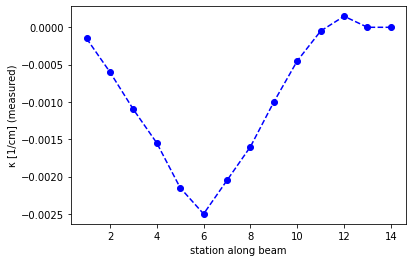

In [5]:
# Extract the relevant columns from the dataframe, converting to a float as well.
dfc1 = dfc[dfc.index % 2 != 0] # Ignore the blank cells.
station = pd.to_numeric(dfc1['Station'], errors='coerce')
kappa_meas = pd.to_numeric(dfc1['κ due to load [1/cm]'], errors='coerce')

# Plot curvature along the beam.
plt.figure()
plt.plot(station,kappa_meas, 'bo--')
plt.xlabel('station along beam')
plt.ylabel('κ [1/cm] (measured)');

Next, we want to find the bending moment along the beam. The supports of the beam can be converted to point loads using overall vertical and moment equilibrium, the results are shown in the figure below. Ensure that you are comfortable with how this is achieved.

<figure>
<center>
<img src='https://raw.githubusercontent.com/fcirak/ElasticBeamsLab/main/figs/BeamSetupNew3a.png' width=600/>
<figcaption>Beam setup with central load and supports as point loads</figcaption></center>
</figure>

By drawing clearly-labeled "free body" diagrams, as explained in the introductory video (an example is shown in the figure below), we can find the *bending moment* $M$ along the beam under the application of the prescribed load. Remember that $W\approx50\mathrm{N}$. Consider equilibrium of the free body by taking moments about the cut, to find $M$ at the cut. Throughout this analysis we will assume that $s\approx x$, where $x$ is the *horizontal* distance along the beam (recall that $s$ is measured *along* the curve). **Use the sign convention in the Structures Data Book**, which has been followed in the figure below. Scan in and include one or two of these free body diagrams in your write-up, if you like. Note that $M$ varies linearly with $s$ (or $x$) between the (point) forces; and so $M$ need only be calculated at a few of the stations, and the rest can be interpolated. Enter your values for $M$ at the $14$ stations into the Google Sheet.

<figure>
<center>
<img src='https://raw.githubusercontent.com/fcirak/ElasticBeamsLab/main/figs/BeamSetupNew4.png' width=600/>
<figcaption>Free body diagram example</figcaption></center>
</figure>

We can now construct a plot of the bending moment $M$ along the beam, in a similar way to the curvature $\kappa$ above. This plot is known as the *bending moment diagram*. Again, use the name of your Google Sheet instead of 'Elastic_Beams_Template'.

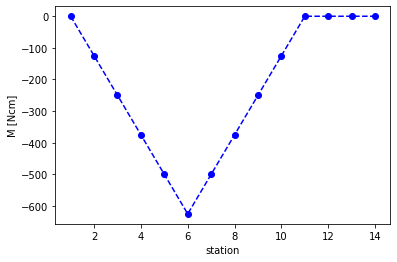

In [6]:
# Reload in the worksheet with the new data, but don't render the DataFrame this time.

# Use the name of your Google Sheet here instead of 'Elastic_Beams_Template'. 
spreadsheet = gc.open('Copy of Elastic_Beams_Template')

# Load the worksheet.
worksheet = spreadsheet.worksheet('Sheet1')

# Get_all_values gives a list of rows.
rows = worksheet.get_all_values()

# Convert to a DataFrame.
dfc = pd.DataFrame.from_records(rows)

#Tidy up the data.
dfc = dfc.drop([0])
dfc = dfc.rename(columns={0:'Station', 1:'Initial Curvature [1/cm]', 2:'Final Curvature [1/cm]', 3:'κ due to load [1/cm]', 4:'M [Ncm]', 
                          5:'κ "simplified" = M/B [1/cm]', 6:'κ_meanΔs = Δψ [radians]', 7:'ψ [radians]', 8:'ψ_meanΔs = Δy [cm]', 9:'y [cm]'})

# Extract the relevant columns from the dataframe, converting to a float as well.
dfc2 = dfc[dfc.index % 2 != 0] # Ignore the blank cells.
station = pd.to_numeric(dfc2['Station'], errors='coerce')
moment = pd.to_numeric(dfc2['M [Ncm]'], errors='coerce')

# Plot moment along the beam.
plt.figure()
plt.plot(station,moment, 'bo--')
plt.xlabel('station')
plt.ylabel('M [Ncm]');

What do you notice about the shape of the two graphs, $\kappa$ and $M$?

Therefore, what would you expect a plot of $M$ against $κ$ to look like? Plot it using the next code cell.

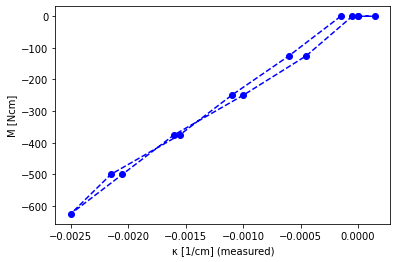

In [7]:
# Plot moment against curvature.
plt.figure()
plt.plot(kappa_meas,moment, 'bo--')
plt.xlabel('κ [1/cm] (measured)')
plt.ylabel('M [Ncm]');

A few final points to consider from this section of calculations, which you should also include in your write-up:

1. Estimate the value of $B$, the bending stiffness of the beam, using the plot above. Note that if $M \propto \kappa$, $M/\kappa = B$, in other words $B$ is the constant of proportionality between bending moment and curvature - the slope of the plot above. We'll use this value in the next section.
2. What are the units of $B$?
3. Could you say that the curvature gauge actually provides a way of measuring the bending moment?

Answers:

1. 230000 to 250000, average of 240684, which is about 240000
2. Ncm^2
3. Yes, multiply by bending stiffness

### Derivation of deflections from curvatures by numerical integration

We can now calculate the deflections from the curvatures.

Use the Google Sheet to compute a "simplified" set of curvature values by use of $κ = M/B$, with the calculated values of $M$ and the experimental value of $B$ you found above. Check a few values manually using a calculator. This set is directly proportional to $M$, and so it is a linearised version, free from any random experimental errors. We have essentially used the experiment to find an experimental value for $B$, and used our knowledge of the theoretical shape of $M$, to obtain this "simplified" $\kappa$. Hopefully the numbers in the '$κ$ due to load' and '$κ$ "simplified" = $M/B$' columns are similar.

Plot "simplified" $\kappa$ using the code below. We also plot the experimental measured $\kappa$ to show the similarity. Does this introduce any significant errors?


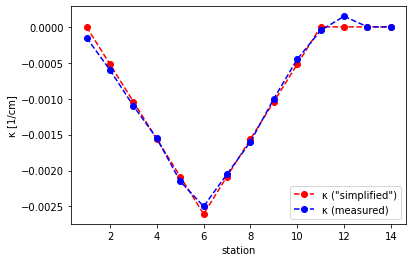

In [8]:
# Reload the worksheet with the new data again.

# Use the name of your Google Sheet here instead of 'Elastic_Beams_Template'. 
spreadsheet = gc.open('Copy of Elastic_Beams_Template')

# Load the worksheet.
worksheet = spreadsheet.worksheet('Sheet1')

# Get_all_values gives a list of rows.
rows = worksheet.get_all_values()

# Convert to a DataFrame.
dfc = pd.DataFrame.from_records(rows)

#Tidy up the data.
dfc = dfc.drop([0])
dfc = dfc.rename(columns={0:'Station', 1:'Initial Curvature [1/cm]', 2:'Final Curvature [1/cm]', 3:'κ due to load [1/cm]', 4:'M [Ncm]', 
                          5:'κ "simplified" = M/B [1/cm]', 6:'κ_meanΔs = Δψ [radians]', 7:'ψ [radians]', 8:'ψ_meanΔs = Δy [cm]', 9:'y [cm]'})

# Extract the relevant columns from the dataframe, converting to a float as well.
dfc3 = dfc[dfc.index % 2 != 0] # Ignore the blank cells.
station = pd.to_numeric(dfc3['Station'], errors='coerce')
kappa_simp = pd.to_numeric(dfc3['κ "simplified" = M/B [1/cm]'], errors='coerce')

# Plot curvature along the beam.
plt.figure()
plt.plot(station,kappa_simp, 'ro--', label='κ ("simplified")')
plt.plot(station,kappa_meas, 'bo--', label='κ (measured)')
plt.xlabel('station')
plt.ylabel('κ [1/cm]')
plt.legend();

Recalling that $κ = \mathrm{d}\psi/\mathrm{d}s$ and rearranging, we can see that $\psi = \int\mathrm{d}\psi + c=\int\kappa\mathrm{d}s + c$. We can then approximate these intergrals as $\psi = \Sigma\Delta\psi=\Sigma\kappa\Delta s + c$, and instead sum the area under the "simplified" $\kappa$ plot rather than integrate. We take $Δs = 5\,\mathrm{cm}=$ the spacing between stations. Since the "simplified" $\kappa$ plot is linear, using the average curvature from one station to the next would give the exact area under the curve: $κ_{\mathrm{mean}} = (\kappa_n + \kappa_{n+1})/2$, where $\kappa_n$ and $\kappa_{n+1}$ are the curvatures at two adjacent stations. We can then evaluate $Δψ = κ_{\mathrm{mean}} × Δs$ (before the integration/summation), which gives the area of the trapezium under the curve between the two stations of interest, and hence we can see why we have the grey cells in the Google Sheet - due to $\kappa_\mathrm{mean}$ being the average between two adjacent stations. Make sure to use your "simplified" $\kappa$ values in these calculations. Work on the Google Sheet, but also check a few values manually with a calculator. These numbers are the areas under the $\kappa$ plot between adjacent stations; they should be *negative* due to the sign of $\kappa$.

But what about the "$+c$"? We can find the rotation or slope of the beam, $ψ$, by cumulatively summing values of $Δψ$, starting at the point where $ψ = 0$ (at the point of symmetry). By starting at where $ψ = 0$, we are using a boundary condition, and hence this gives us the vertical shift that comes from the "$+c$" as part of the integration. We can now do this for our beam - start at midspan, where $\psi=0$, and sum first towards the right-hand end of the beam and then towards the left. Again, use the Google Sheet to do this, also checking a few numbers manually. Note that we want to achieve $\psi_{n+1} = \psi_n + \Delta\psi_{n,n+1}$. This means that when working towards the right-hand end of the beam $\psi_{n+1}$ is unknown and we can simply add $\Delta\psi_{n,n+1}$ as we go down the table, but when working towards the left $\psi_n$ is the unknown, so we have to *subtract* $\Delta\psi_{n,n+1}$ as we go up the table.

This whole method is called *numerical integration* - you are approximating and then summing up the *change* in $ψ$ along the beam. Like with analytical integration, we need one boundary condition to get the "$+c$"; here we use the symmetry of the deflected beam, which gives us the condition that the slope at the midspan $=0$.

Make a plot of $ψ$ against $s$ using the code below. This is the slope or rotation profile of the beam. Note that there's no gradient discontinuity in this plot, c.f. the curvature plot. Also note the *anti-symmetry* of the plot, again c.f. the curvature plot. Check the sign of your plot: remember that $κ = \mathrm{d}\psi/\mathrm{d}s$, so consider the sign of the gradient of your $\psi$ plot compared to your $\kappa$ plot.

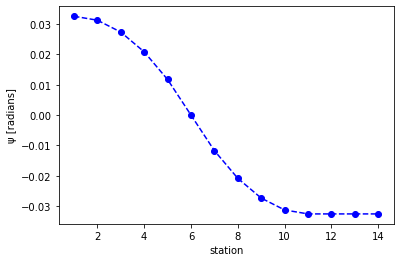

In [9]:
# Reload in the worksheet with the new data again.

# Use the name of your Google Sheet here instead of 'Elastic_Beams_Template'. 
spreadsheet = gc.open('Copy of Elastic_Beams_Template')

# Load the worksheet.
worksheet = spreadsheet.worksheet('Sheet1')

# Get_all_values gives a list of rows.
rows = worksheet.get_all_values()

# Convert to a DataFrame.
dfc = pd.DataFrame.from_records(rows)

# Tidy up the data.
dfc = dfc.drop([0])
dfc = dfc.rename(columns={0:'Station', 1:'Initial Curvature [1/cm]', 2:'Final Curvature [1/cm]', 3:'κ due to load [1/cm]', 4:'M [Ncm]', 
                          5:'κ "simplified" = M/B [1/cm]', 6:'κ_meanΔs = Δψ [radians]', 7:'ψ [radians]', 8:'ψ_meanΔs = Δy [cm]', 9:'y [cm]'})

# Extract the relevant columns from the dataframe, converting to a float as well.
dfc4 = dfc[dfc.index % 2 != 0] # Ignore the blank cells.
station = pd.to_numeric(dfc4['Station'], errors='coerce')
rotation = pd.to_numeric(dfc4['ψ [radians]'], errors='coerce')

# Plot the rotation along the beam.
plt.figure()
plt.plot(station,rotation, 'bo--')
plt.xlabel('station')
plt.ylabel('ψ [radians]');

In general, $\mathrm{d}y/\mathrm{d}s = \sinψ$, where $y$ is the vertical displacement of the beam. Since the angle $ψ$ is generally small, we may write $ψ = \mathrm{d}y/\mathrm{d}s$; to follow the sign convention in the Structures Data Book, we will work with the definition $ψ = -\mathrm{d}y/\mathrm{d}s$. From the previous calculations, $\psi$ and $\Delta s$ are known. Therefore, compute approximately the value of $Δy$ between successive stations, using the same method as before, by evaluating $-ψ_{\mathrm{mean}} × Δs$, in each step, and making use of the Google Sheet. Note that we are again assuming the areas under the curve between successive stations are trapezia, but the plot of $\psi$ is not linear (unlike $\kappa$), so these are now approximations.

Hence use the Google Sheet to find the vertical displacement, $y$, using the same method as before, this time starting at one of the supports where $y = 0$. It is recommended that you start at the left support (station 1) and work down the table. If everything has gone smoothly, you should get exactly $y=0$ at the other support, as required, due to symmetry.

Make a plot of $y$ against $s$ using the code below. Note that we've gone back to a *symmetric* plot, c.f. the curvature and rotation plots. Observe the shape of $y$ - it should look like the deflected shape of the beam (in the video).

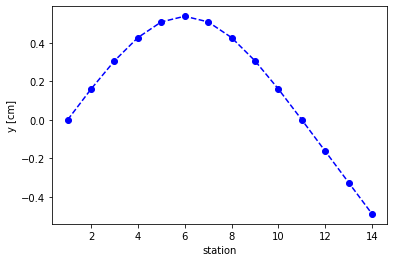

In [10]:
# Reload in the worksheet with the new data again.

# Use the name of your Google Sheet here instead of 'Elastic_Beams_Template'. 
spreadsheet = gc.open('Copy of Elastic_Beams_Template')

# Load the worksheet.
worksheet = spreadsheet.worksheet('Sheet1')

# Get_all_values gives a list of rows.
rows = worksheet.get_all_values()

# Convert to a DataFrame.
dfc = pd.DataFrame.from_records(rows)

#Tidy up the data.
dfc = dfc.drop([0])
dfc = dfc.rename(columns={0:'Station', 1:'Initial Curvature [1/cm]', 2:'Final Curvature [1/cm]', 3:'κ due to load [1/cm]', 4:'M [Ncm]', 
                          5:'κ "simplified" = M/B [1/cm]', 6:'κ_meanΔs = Δψ [radians]', 7:'ψ [radians]', 8:'ψ_meanΔs = Δy [cm]', 9:'y [cm]'})

# Extract the relevant columns from the dataframe, converting to a float as well.
dfc5 = dfc[dfc.index % 2 != 0] # Ignore the blank cells.
station = pd.to_numeric(dfc5['Station'], errors='coerce')
displacement = pd.to_numeric(dfc5['y [cm]'], errors='coerce')

# Plot the displacement along the beam.
plt.figure()
plt.plot(station,displacement, 'bo--')
plt.xlabel('station')
plt.ylabel('y [cm]');

Does this agree with the directly measured deflection point (measured using the displacement gauge)? Remember you noted down this value and location while watching the experiment video. This direct measurement of the deflection at a single point along the beam was taken as an independent spot check, to ensure that the deflection derived using the measured curvature is reliable. Re-plot the graph above using the code below, which includes a point for the directly measured displacement, which you need to fill in. Remember the displacements in the plot are in $\mathrm{cm}$, defined as positive upwards.

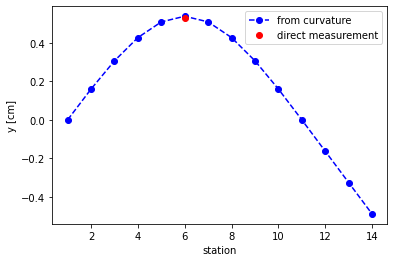

In [11]:
disp_meas =   0.526    # Fill in the measured point displacement here (in cm).
station_disp =   6 # Fill in the station where the displacement was measured.

# Plot the displacement along the beam.
plt.figure()
plt.plot(station,displacement, 'bo--', label='from curvature') # Displacement from curvature measurements.
plt.plot(station_disp,disp_meas, 'ro', label='direct measurement') # Displacement from direct measurement.
plt.xlabel('station')
plt.ylabel('y [cm]')
plt.legend();

## Part IV: Write-up

To finish this lab, you'll write an individual report, using a word processor of your choosing. Alternatively, you may hand write your report if you wish, but you then need to scan it in to submit it to Moodle. Consider the following points:

1. The report should begin with **Title**, **date** (of your lab slot), **Summary** (write this *last*) and **Introduction**. The summary is a synopsis of the whole report, including conclusions. It should consist of about five carefully thought-out sentences.
2. The report should be *concise*: the marker will only have 5 minutes in which to read it. This means it should be no more than 4 sides of A4 in total (including graphs, etc). It's up to you how you split the space between text and figures, but a good balance between the two is advised.
3. For the sections **Apparatus**, **Method** and **Setup** write little and then refer to the relevant sections in this Colab notebook. Don't waste space explaining the experiment in detail. However, your report should be standalone, so you should still include a short summary of these sections, do not simply just refer to the Colab notebook.
4. **Results**, **Observations** and **Calculations**.  Think about how best to present these sections for this experiment.  Although the various steps which were taken in the experiment are set out in this Colab notebook, you will need to write short paragraphs about some of the items in order to make your record complete. Word processing calculations and equations can be time consuming, scanned in hand calculations are sufficient.
5. After you’ve plotted your graphs in this notebook, you can right click on any of them and “Save as”. It’s up to you which graphs you include in your report. If you're comfortable with Python, you may choose to make your graphs more fancy, which is welcome, but not required, and the default graphs plotted by the code provided are sufficient. If you would like to include the table of data from the Google Sheet, put this in an Appendix.
6. You should also calculate the *calibration factor* of the curvature gauge. Note the calibration reading found using the large wheel (this is read out in the Experiment video), and finish with a statement that the curvature gauge gives a reading "X% higher/lower than the true curvature" (to 2 s.f.). Would you say this gauge is accurate?
7. If you do this lab after the lecture about the calculation of $B = EI$, you could make an independent check on the value of $B$. The beam is made of Aluminium alloy (hint: use the Structures data book, not Materials), and you should take the thickness of the beam as $4.63\,\mathrm{mm}$ and the width as $40\,\mathrm{mm}$ when calculating $I$. Note that in the calculation of $M$ (leading to the experimental value of $B$), we approximated $W=5\,\mathrm{kg}\approx 50\,\mathrm{N}$, and so gravitational acceleration was taken as $g = 10\mathrm{m/s^2}$, compared to the actual numerical value of $9.81$.
8. In relation to the method used to find the experimental beam rotation, $\psi$, and beam deflection, $y$, in Part III of this notebook, you should have a short section on *numerical integration*, in which you explain the method concisely. Remember we used the symmetry of the beam to find where $\psi=0$, ultimately obtaining the deflections; what if there was no condition of symmetry, e.g. an asymmetric load - could you still get to the deflections for a non-symmetric case? Hint: think about analytical intergration, and that we need two boundary conditions when integrating twice, but for the symmetric case we technically had three - the slope being $0$ at midspan and both the supports having $0$ displacement. Also check that, given $y$, you could get back to $\psi$ and $\kappa$ by differentiation.
9. Under **Discussion** you should make a comparison of the deflection at a particular point on the beam (a) as computed in the Google Sheet from the measured curvatures and (b) as measured directly. Are the measured curvatures accurate? Is measuring and validating the deflection at just one point good enough? If you could do the experiment yourself, how many points would you measure using the displacement gauge? Do you expect much to change if you make a correction for the calibration factor of the curvature gauge (above)? If you're not sure, try it!
10. You should include under **Discussion** a short section on *sources of error* in the experiment. As you have not done the experiment yourself, use your best judgement from the Experiment video. No statistics, please; just common-sense remarks. Note that the errors in this particular experiment are very small (order of $1\%$), so these comments should be very brief (c.f. the Structural Design Course where the collapse load is often $30\%$ different from expected value). Hint: if you are thinking about whether the self-weight of the beam and/or the curvature gauge would cause an error, remember that we subtracted away the initial curvatures. Considering this, do you think the self-weights would affect the results?
11. Some additional related topics you might like to discuss, if you have space left in your 4 pages: a) can we do these integrations analytically? Consider the discontinuous slopes of functions to be integrated. b) The Structures Data Book indicates that, for a given point load, the deflection of a beam $\propto$ (span)$^3$. Can you explain from the integrations in the current analysis where this power of three comes from?
12. Your **Conclusions** section should be brief: state your conclusions clearly.
13. You may wish to include this Colab notebook as an **Appendix**, by providing a link to it at the end of your report. Any Appendices do not count towards your 4 pages, but bear in mind that the marker will not read them in detail.

**When you have finished your report, submit it as a pdf on the IA Elastic Beams Moodle page.**

**Your deadline is 2 weeks after your scheduled lab slot.**

---
Original handout by Prof. Fehmi Cirak, converted to Colab by Dr. Petia Tzokova